This is an update from my [previous post]({filename}/hows-julia.ipynb) about
the health of the [Julia programming language](https://julialang.org).

See that post for an introduction to Julia, and my interest in it, as someone
teaching data science.

The source for this document is a Jupyter Notebook. You can get the original
`hows-julia-2020.ipynb` notebook from the [Github repository of this
blog](https://github.com/matthew-brett/asterisk-blog).

## Summary

As for the previous post, I collected time-series data from the Julia language
repository commits, proportion of Github PRs, and two language ranking sites.

The update from April 2019 gives further evidence to suggest that Julia is not
growing quickly.

## Health of the Julia repository

This is an update on the health of the code repository for the language itself.
That repository has the code for the base Julia language and its standard
libraries.

In [1]:
from collections import Counter
import datetime as dt
import itertools

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Again, I used some [code to analyze commit
history](https://gist.github.com/tacaswell/e95cb2d57ca3783ffc40) kindly posted
by Thomas Caswell.

Following Thomas' recipe, I first took a local clone of the [Julia Language repository](https://github.com/JuliaLang/julia).

I continued the recipe by using Git on the local clone to extract author + commit date from the Git version control repository from January 1 2013 till now.

```
echo 'time&name' > julia_commits_2020-02.csv
git log --no-merges --since=2013-01-01 --pretty=format:'%at&%aN <%aE>' >> julia_commits_2020-02.csv
```

There's a copy of `julia_commits_2020-02.csv` in
[downloads/julia_commits_2020-02.csv](../downloads/julia_commits_2020-02.csv).

In [2]:
commits = pd.read_csv('downloads/julia_commits_2020-02.csv', sep='&')

The first figure is the cumulative plot of the number of
commits, by committer number, where the committer numbers give the order or
each committer in terms of number of commits.  Committers with more commits
have lower committer numbers. The plot shows that a few committers have made
the large majority of commits, but there is a reasonably large number of
contributors.

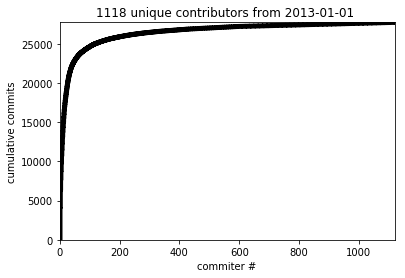

In [3]:
commiters = Counter(commits['name'])
commiter_number = list(range(len(commiters) + 1))
c_count = list(commiters.values())
cum_commits = np.r_[[0], np.cumsum(sorted(c_count, reverse=True))]

fig, ax = plt.subplots()
ax.step(commiter_number, cum_commits, where='post', color='k', lw=5)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
ax.set_xlim([0, max(commiter_number)])
ax.set_ylim([0, np.sum(c_count)])
ax.set_ylabel('cumulative commits')
ax.set_xlabel('commiter #')
ax.set_title("{} unique contributors from 2013-01-01 ".
             format(max(commiter_number)-1));

Next plot the number of commits and number of committers per week:

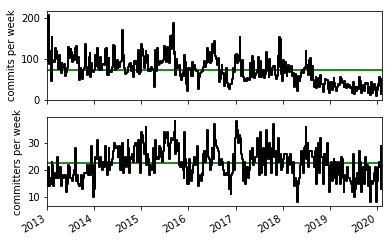

In [4]:
def stats_plotter(ax, left_edges, unq_by_week, col, ylabel):
    ln, = ax.step(left_edges,
                  unq_by_week[col], color='k', where='post', lw=2)

    hln = ax.axhline(unq_by_week[col].mean(), color='forestgreen', zorder=0, lw=2)
    ax.set_ylabel(ylabel)
    return ln, hln


def by_window_binner(ax1, ax2, commits, start, stop, step, window_name):
    edges = np.arange(start, stop + step, step)
    left_edges = [dt.datetime.fromtimestamp(t) for t in edges[:-1]]

    gb = commits.groupby(pd.cut(commits['time'], edges))
    unq_by_bin = gb.agg(lambda x: len(set(x)))

    stats_plotter(ax1, left_edges, unq_by_bin, 'time', 'commits per {}'.format(window_name))
    stats_plotter(ax2, left_edges, unq_by_bin, 'name', 'committers per {}'.format(window_name))

start = dt.datetime(2013, 1, 1).timestamp()
stop  = dt.datetime.now().timestamp()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
by_window_binner(ax1, ax2, commits, start, stop, 7*24*60*60, 'week')
ax1.set_xlim((dt.datetime(2013, 1, 1), dt.datetime(2020, 2, 7)))
fig.autofmt_xdate()

These plots continue to suggest that Julia development has been burning along
at a fairly constant rate, until 2018, when the development rate falls, apart
from a burst before the August 2018 release of version 1.0.

## Percentage of all Github pull requests

This is an update of the proportion of Github Pull Requests that are in the Julia language.

I scraped [these data](../downloads/julia_gh_prs_2020-02.csv) by hand from the [Githut 2.0 site](https://madnight.github.io/githut).

Here is a plot of the PR proportions for R and Julia.

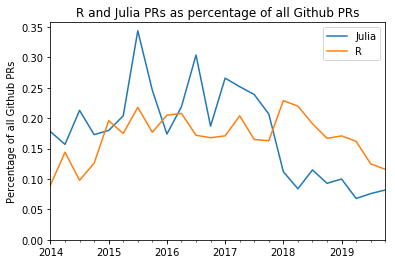

In [5]:
julia_prs = pd.read_csv('downloads/julia_gh_prs_2020-02.csv')
julia_prs['Month'] = (julia_prs['Quarter'] - 1) * 3 + 2
datish = julia_prs.apply(
    lambda x: f"{x['Year']:0.0f}-{x['Month']:0.0f}", axis=1)
julia_prs.index = pd.to_datetime(datish)
ax = julia_prs.plot(y='Julia', use_index=True)
julia_prs.plot(y='R', use_index=True, ax=ax)
plt.title("R and Julia PRs as percentage of all Github PRs")
plt.ylabel('Percentage of all Github PRs')
plt.ylim(0);

The PR numbers for Julia continue to look rather like the commit plot for the
Julia language repository, and suggest that relative activity dropped off in
2018, compared to 2017.

Here are the values for Python, R and Julia for the 18 months:

In [11]:
julia_prs.head(6)[['Python', 'R', 'Julia']]

,Python,R,Julia
2019-11-01,17.577,0.116,0.082
2019-08-01,17.068,0.125,0.076
2019-05-01,17.803,0.162,0.068
2019-02-01,17.891,0.171,0.100
2018-11-01,17.739,0.167,0.093
2018-08-01,17.503,0.191,0.115


This is the matching plot of PR proportions for Python.  Note the values on the
y axis.

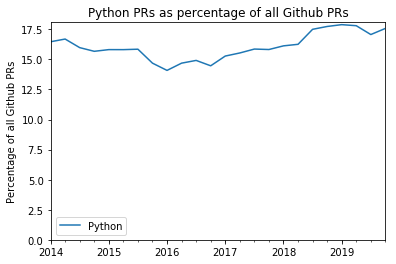

In [7]:
julia_prs.plot(y='Python', use_index=True)
plt.title("Python PRs as percentage of all Github PRs")
plt.ylabel('Percentage of all Github PRs')
plt.ylim(0);

## TIOBE language index

See the previous post for an introduction to the TIOBE index.

I recovered the TIOBE index for Julia for each month from January 2017 to
February 2020, using the archived versions of
<https://www.tiobe.com/tiobe-index>, from <https://archive.org>.

The data file with the index values is
[downloads/julia_tiobe_2020-02.csv](../downloads/julia_tiobe_2020-02.csv).

Some values were below the reporting threshold for the TIOBE index, in which
case I gave Julia the index value for the lowest language that was reported.
This will be a slight overestimate of Julia's value.  I've marked these
below-threshold values with orange dots.

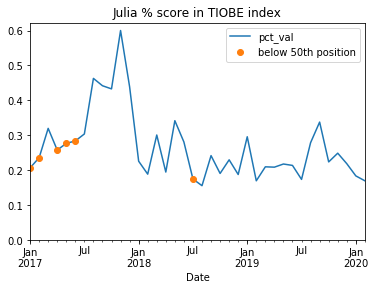

In [8]:
julia_tiobe = pd.read_csv('downloads/julia_tiobe_2020-02.csv')
julia_tiobe['pct'] = julia_tiobe['pct'].apply(lambda x : x.strip())
julia_tiobe['pct_val'] = julia_tiobe['pct'].apply(
    lambda x : float(x[1:] if x.startswith('<') else x))
julia_tiobe.index = pd.to_datetime(julia_tiobe['year_month'])
ax = julia_tiobe.plot(y='pct_val', use_index=True)
belows = julia_tiobe[julia_tiobe['pct'].apply(lambda x : x.startswith('<'))]
belows.plot(y='pct_val', use_index=True,
            style='o', label='below 50th position', ax=ax)
plt.title('Julia % score in TIOBE index')
plt.xlabel('Date')
plt.ylim(0);

The plot suggests that Julia is has been hovering around a fairly stable score of around 0.2% since the beginning of 2018.  For comparison, the February 2020 values for Python and R were 9.345% and 1.005%, respectively.

## Redmonk Programming Language Rankings / Stack Overflow

See the previous post for an introduction to the [Redmonk
ratings](https://redmonk.com/sogrady/category/programming-languages).

The scores below are from the main text of the:

* [June 2019 ratings](https://redmonk.com/sogrady/2019/07/18/language-rankings-6-19);
* [Q1 2019 rankings](https://redmonk.com/sogrady/2019/03/20/language-rankings-1-19);
* [Q3 2018 rankings](https://redmonk.com/sogrady/2018/08/10/language-rankings-6-18).

| Year | Quarter | Position |
|------|---------|----------|
| 2019 | 3       | 33       |
| 2019 | 1       | 34       |
| 2018 | 3       | 36       |
| 2018 | 2       | 39       |
| 2018 | 1       | 40       |
| 2017 | 4       | 52       |

Quoting from the June 2019 rankings page:

> Julia remains distant from mainstream usage and visibility, but continues an
> upward, if glacial, ascent, clocking in at #33 up from #34 in January’s
> numbers. While on the one hand the trendline is positive if uninspiring, the
> fact remains that Julia is less popular by this measure than low visibility
> languages such as Dart (#27), Elixir (#29), Lua (#22) and Matlab (#23). There
> is nothing to preclude a continued ascent, or even an acceleration of this –
> there is ample historical precedent. But there is also nothing in either the
> data here or the market context which would suggest this is likely or
> imminent.

Some data for the Redmonk rankings come from [Stack Overflow
data](https://insights.stackoverflow.com/trends).  Here is an update of the
percentage of Stack Overflow questions on Julia:

![SO Julia](images/so_julia_2020-02.png)

There is a spike in late 2018, perhaps corresponding to the first release, and another apparent spike in mid-late 2019, but the overall pattern over the last few years could be steady growth of around 0.01% per year.

You can run that query on current data with [this
URL](https://insights.stackoverflow.com/trends?tags=julia-lang).

Here are the results from the equivalent query for R and Python:

![SO R Python](images/so_r_python_2020-02.png)

This is the matching [query
URL](https://insights.stackoverflow.com/trends?tags=r%2Cpython)